In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_3178/2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


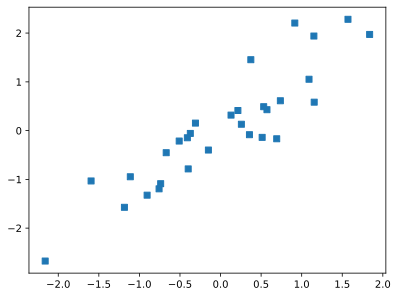

In [18]:
# create
N=30
x=torch.randn(N,1)
y=x+torch.randn(N,1)/2

plt.plot(x,y,'s')
plt.show()

In [19]:
# pytorch model build
ANNreg=nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(), # Activation function
    nn.Linear(1,1) # Output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [20]:
# learning rate
learningRate=.05

# loss function
lossfun=nn.MSELoss()

# optimizer(Flavour of GD to implement)
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [21]:
# train the model
num_epochs=500
losses=torch.zeros(num_epochs)

# Train Fr
for epochi in range(num_epochs):
    # fwd pass
    yHat=ANNreg(x)

    # compute loss
    loss=lossfun(yHat,y)
    losses[epochi]=loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

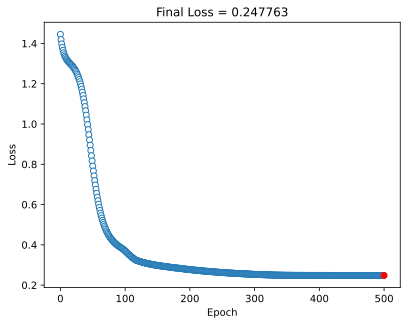

In [22]:
# show losses

# manually compute losses
# final fwd pass
predictions=ANNreg(x)

# final loss(MSE)
test_loss=(predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(num_epochs,test_loss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final Loss = %g' %test_loss.item())
plt.show()

In [23]:
test_loss

tensor(0.2478, grad_fn=<MeanBackward0>)

In [24]:
test_loss.detach()

tensor(0.2478)

In [25]:
test_loss.item()

0.24776287376880646

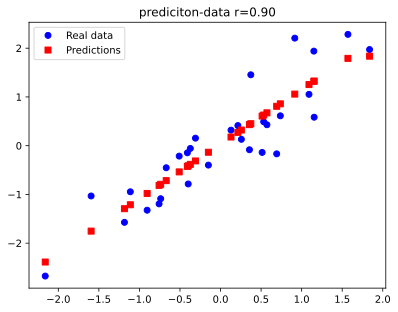

In [26]:
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediciton-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()